## Packages

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from collections import namedtuple
%matplotlib inline

In [4]:
""" ⚡⚡⚡⚡⚡⚡⚡ """ 
# Remove this if you want to test neural activities. this is for reporducibility purpose
np.random.seed(19680801)

### Optimizations for Matplotlib

In [5]:
import matplotlib as mpl
import matplotlib.style as mplstyle
mpl.rcParams['path.simplify'] = True
mpl.rcParams['path.simplify_threshold'] = 1.0
mpl.rcParams['agg.path.chunksize'] = 10000
mplstyle.use('fast')

### Leaky Integrate & Fire Model

In [183]:
class LIF:
    __slots__ = ['dt__τ', 'θ', 'R', 'u_rest', 'u', 'input',  'spike_trace', 'isi', 'posts', 'input']
 
    def __init__(self, config: namedtuple):
        self.θ = config.threshold
        self.R = config.resistor
        self.u_rest = config.uRest
        self.dt = config.dt 
        self.τ = config.tau
        self.isi = int(config.isInhibitory)
        self.u = self.u_rest
        self.input = {}
        self.spike_trace = []
        self.posts = []
        
    def integrate(self, I, t):
        """ 
        integrate(currentValue, currentTime)
        return one if neuron spikes in currentTime otherwise it will return zero
        """
        
        # compute potential
        self.u += (self.u_rest - self.u + self.R * I) * (self.dt / self.τ)
        # Add presynaptic input
        self.u += self.input.get(t, 0) * self.R * (self.dt / self.τ)
        #  compute spikes
        if self.u >= self.θ:
            self.u = self.u_rest
            self.spike_trace.append(t)
            # update entry input for post synaptic neurons
            for synapse in self.posts:
                fs_time = t + (1//self.dt*self.dt) + self.dt  # future spikes time
                if fs_time no in synpse.neuron.input:
                        synapse.neuron.input[fs_time] = 0
                synapse.neuron.input[fs_time] += pow(-1,self.isi) * synapse.w
        
        return int(t in self.spike_trace[-1:]) # if neuron has just spiked in time t return 1 otherwise 0    
    
    def reset(self, t, alpha):
        # reset inputs
        if self.input.get(t, 0) == 0:
            return
        value = self.input.pop(t)
        # search for next 6 feasable seconds delayed
        for sec in range(1, 6):
            fs_time = t + (sec//self.dt*self.dt) 
            if fs_time in self.input:
                self.input[fs_time] += value * alpha

### Inverstigation

In [20]:
# LIFConfig=namedtuple('LIFConfig', 'tau resistor threshold uRest dt isInhibitory')
# lif_config = LIFConfig(5, 10, -65, -70, 0.5, False)
# currents = np.linspace(0, 2, 200)
# currents = np.array([0.6 for i in range(200)])
# dts = np.linspace(0,10, 200)
# neuron = LIF(lif_config)

## STDP unsupervised learning 


```python
src = LIF_Neuron
dest = LIF_Neuron

current_src <- noisy current for src for duration 
current_dest <- noisy current for dest for duration 

#connect src to dest with stdp config

for neuron in [src, dest]:
    # compute neuron potential
    # apply pre synaptic for neuron
    # compute spikes for neuron
    # reset inputs for neuron
    
    if src.spiked and dest.spiked :
        update.stdp_connection
        store.append([deltaT, deltaW]
```


In [21]:
dt = 1
duration = 20
delta_w_delta_t = []
s = []
d = []
for i in np.arange(-1 * duration, duration, 0.5):
    sd = get_current(duration, dt, i)
    s.append(sd[0])
    d.append(sd[1])

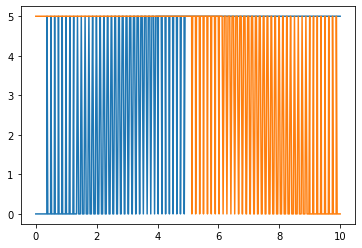

In [27]:
s = np.array(s).flatten()
plt.plot(np.linspace(0, 10, 1600), s)
d = np.array(d).flatten()
plt.plot(np.linspace(0, 10, 1600), d)


### first Phase

In [191]:
# params
MAX_I = 5
LIFConfig = namedtuple('LIFConfig', 'tau resistor threshold uRest dt isInhibitory')
lif_config = LIFConfig(5, 10, -65, -70, 0.5, False)
SynapseConfig = namedtuple('SynapseConfig', 'neuron w')
dt = 1
duration = 20
delta_gap = 0.5
INIT_WEIGHT = 1
ΔwΔt = []

In [175]:
def get_current(duration, dt, delta):
    src = []
    dest = []
    times = np.arange(0, duration, dt)
    if delta >= 0:
        src = np.array([MAX_I] * times.shape[0])
        dest = np.zeros(times.shape)
        dest[times >= delta] = MAX_I
        return zip(src, dest)
    
    dest = np.array([MAX_I] * times.shape[0])
    src = np.zeros(times.shape)
    src[times >= -1*delta] = MAX_I
    return zip(src, dest, times)

In [193]:
for delta in np.arange(-1*duration, duration, delta_gap):
    currents = get_current(duration, dt, delta)
    src = LIF(lif_config)
    dest = LIF(lif_config)
    
    # set connection
    src.post.append(SynapseConfig(dest, INIT_WEIGHT))
    for (Is, Id, t) in currents:
        src.integrate(Is, t)
        src.reset(t, alpha=0.5)
        
        dest.integrate(Is, t)
        dest.reset(t, alpha=0.5)
        
        if (len(src.spike_trace) and len(dest.spike_trace)):
            for synapse in pre.post:
                w = synapse.w
                Δw, Δt = stdp(w, src.spike_trace[-1], dest.spike_trace[-1])
                synapse._replace(w=w+Δw)
                ΔwΔt.aapend([Δw, Δt])
            break
delta_w_delta_t = np.array(delta_w_delta_t)
plt.plot(delta_w_delta_t[:, 0], delta_w_delta_t[:, 1], 'o')
plt.show()

AttributeError: 'LIF' object has no attribute 'post'

$\Delta_t \geq  0 \implies t_{pre} < t_{post}$

In [197]:
# def stdp(w, t_pre, t_post, w, tau_=5. tau__=5, A__=lambda x: 10, A_=lambda x: -10):
#     Δt =  t_post - t_pre
#     if (Δt >= 0):
#         # A Plus or minus minus :)
#         Δw =  A__(w) * np.exp(-abs(Δt) / tau__)    
#     else:
#         # A minus
#         Δw =  A_(w) * np.exp(-abs(Δt) / tau_)
#     return Δw, Δt 
# SynapseConfig = namedtuple('SynapseConfig', 'neuron w')
# syn = SynapseConfig(50, 1)
# print(syn)
# syn = syn._replace(w=2)
# print(syn)



SyntaxError: invalid syntax (<ipython-input-197-e9014f6650de>, line 1)

## Report

The temporal distance of the spikes in the pair is of the order of a
few to tens of milliseconds, whereas the temporal distance
between the pairs is of the order of hundreds of milliseconds to
seconds.
Experiments show that increasing the repetition frequency leads
to an increase in potentiation.
The pair-based STDP cannot give a full account of experimental
results (repetition frequency or triplet and quadruplet
experiments).
According to the pair-based STDP, if the repetition frequency r is
increased, the depression effect becomes greater, which is not
experimentally true!
Instead, symmetric triplets of the form pre-post-pre and
post-pre-post are used.

The LTP is proportional to the value of xj evaluated at tif and the slow trace yi;2:
∆w+
ij (tif ) = A+(wij)xj(tif )yi;2(tif−);
where tf−
i indicates the value of yi;2 before it is incremented due to the postsynaptic spike at tif .
Similar argument works for LTD

STDP learning rule
The change in weight of a synapse depends on the temporal
difference j∆tj = jtpost − tprej:
∆w+ = A+(w) · exp(−j∆tj=t+) at tpost for tpre < tpost;
∆w
− = A−(w) · exp(−j∆tj=t−) at tpre for tpre < tpost:
Happens immediately after each
spike (at times tpre and tpost).
This rule is fully specified by
defining:
(i) the weight-dependence of the
amplitude parameter A±(w).
(ii) which spike pairs are taken into
consideration (all pairs or
nearest one).
Two intracellular electrodes were used (one for stimulation, one
for measurement of the neuronal response).
Excellent spatial and temporal resolution.
Synaptic weight change (∆wji) turns out to be a function of tjf −tif .
The direction of the change depends on the relative timing of preand postsynaptic spikes. 496 Synaptic 
Two intracellular electrodes were used (one for stimulation, one
for measurement of the neuronal response).
Excellent spatial and temporal resolution.
Synaptic weight change (∆wji) turns out to be a function of tjf −tif .
The direction of the change depends on the relative timing of preand postsynaptic spikes. 496 Synaptic 

### Neuron Populations


$\Delta t$ is a small time interval

##### Population Activity $A(t)$
$n_{act}(t, t + \Delta t)$ return number of spikes for population

$A(t) = \lim\limits_{\Delta t \to 0} \frac{n_{act}(t, t + \Delta t)}{\Delta t * N}$ in discrit mathematic we approximate to $\frac{\sum\limits_{j=1}^N \sum\limits_{f} \delta (t - t^f)}{N}$


In [202]:
class Population:
    def __init__(self, conf: namedtuple):
        self.size = conf.size
        
        # inhibitory neurons
        isi_size = int((1 - conf.splitSize) * self.size)
        self.neurons = [conf.neuron(conf.isiConfig) for _ in range(isi_size)]
       
        # exicitory neurons
        self.neurons.extend(
            [conf.neuron(conf.iseConfig) for _ in range(self.size - isi_size)]
        )
        
        self.α = conf.traceAlpha
        self.activities = []
        
    def activate(self, I, t):
        # count of spikes for all neurons with a generator        
        n_act = sum((neuron.integrate(I, t) for neuron in self.neurons))
        self.activities.append((t, n_act / self.size))
    
    def reset_inputs(self):
        for neuron in self.neurons:
            neuron.input = min(0, (1 - self.α) * neuron.input)
    
    def get_detailed_spikes(self):
        return np.array([
            [i, tf] for (i, neuron) in enumerate(self.neurons) for tf in neuron.spike_trace
        ])


#### Configuration (namedtuple)

lif:
+ tau : $\tau$
+ resistor: $R$
+ threshold: $\theta$
+ uRest: $u_{rest}$
+ dt: small interval of time to make dynamic equeation discrete
+ isInhibitory: falg showing a neuron is inhibitory or not 

synapse:
+ neuron: reference to post synaptic neuron (it can be from other populations)
+ w: connection weight

population:
+ size: size of population
+ splitSize: $pop = [(1-splitSize) * size] * neurons^{inhibitory} \cup [splitSize * size] * neurons^{excitatory}$
+ neuron: neuron model [LIF, ELIF, AELIF, ...]
+ isiConfig: configuration for inhibitory neurons 
+ iseConfig: configuration for excitatory neurons 
+ traceAlpha: $\alpha$ used in inputs reseting phase 

In [206]:
CONFIGS = {
    # neurons
    "lif": namedtuple('LIFConfig', 'tau resistor threshold uRest dt isInhibitory'),
    # connections
    "synapse": namedtuple('SynapseConfig', 'neuron w'),
    "connection": namedtuple('ConnectionTypeConfig', 'mu sigma coupling_probability'),
    # population
    "population": namedtuple('PopulationParams', 'size splitSize neuron isiConfig iseConfig traceAlpha'),
}

In [207]:
Synapse = CONFIGS['synapse']

def full_connectivity(pre_neurons, post_neurons, config):
    μ, σ = config.mu, config.sigma    
    normal = np.random.normal

    for pre in pre_neurons:
        for post in post_neurons:
            pre.posts.append(Synapse(post, normal(μ, σ)))

            
def fixed_coupling_probability_connectivity(pre_neurons, post_neurons, config):
        C_pre_size = int(config.coupling_probability * len(pre_neurons))
        C_post_size = int(config.coupling_probability * len(post_neurons))

        μ, σ = config.mu, config.sigma    
        normal = np.random.normal

        for pre in np.random.choice(pre_neurons, C_pre_size, replace=False):
            pre.posts.extend([
                Synapse(post, normal(μ, σ)) for post in
                    np.random.choice(pre_neurons, C_post_size, replace=False)
            ])

            
def fixed_number_of_presynaptics_parents(pre_neurons, post_neurons, config):
    C = int(config.coupling_probability * len(pre_neurons))
    μ, σ = config.mu, config.sigma    
    normal = np.random.normal
    for post in post_neurons:
        for pre in np.random.choice(pre_neurons, C, replace=False):
            pre.posts.append(Synapse(post, normal(μ, σ)))

            
connectivities = {
    'full': full_connectivity,
    'fixedCP': fixed_coupling_probability_connectivity,
    'fixedNPP': fixed_number_of_presynaptics_parents,
}

In [ ]:
### utitlites + Plotters
def noise(μ=0, σ=0.5):
    return np.random.normal(μ, σ)
def choice(*choices):
    return np.random.choice(choices)
class CurrentManager:
    def __init__(self, duration, dt, currents):
        self.time_intervals = np.arange(0, duration, dt)
        self.currents = currents(duration, dt) if callable(currents) else currents
    def __enter__(self):
        return zip(self.currents, self.time_intervals)
    def __exit__(self, type, value, traceback):
        del self.currents
        del self.time_intervals


In [208]:
def raster_plot(x, y, c):  
    plt.scatter(x, y, s=1, c=c)
    for (area,color,label) in [(20, 'y', 'inhibitory'), (80, 'm','excititory')]:
        plt.scatter([], [], c=color, alpha=0.8, s=area, label=label)
    plt.legend(scatterpoints=1, frameon=False, labelspacing=1)

    plt.title("raster plot")
    plt.ylabel("Neurons")
    plt.xlabel("times")
    plt.show()